<a href="https://colab.research.google.com/github/gulabpatel/Object_Detection/blob/main/01_Haarcascade_face_smile_eyes_VideoStream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cascade Classification

One of the key things we can do with vision is object detect.

Object Detection using Haar feature-based cascade classifiers is an effective object detection method proposed by Paul Viola and Michael Jones in their [paper](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf) and improved later by [Rainer Lienhart](http://wiki.opencv.org.cn/images/5/52/MRL-TR-May02-revised-Dec02.pdf).

It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images.

OpenCV provides a training method ( see [Cascade Classifier Training](https://docs.opencv.org/3.4/dc/d88/tutorial_traincascade.html)) or pretrained models, that can be read using the cv2.CascadeClassifierload method. The pre-*trained* models are located in the data folder in the OpenCV installation or can be found [here](https://github.com/opencv/opencv/tree/3.4/data).

Haarcascade github : https://github.com/opencv/opencv/tree/master/data/haarcascades

In [ ]:
# Download the test image and utils files
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/test.jpg \
    -O test.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml \
    -O haarcascade_smile.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_eye.xml \
    -O haarcascade_eye.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py

# these imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

--2022-07-03 13:48:21--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/test.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240458 (235K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>] 234.82K  --.-KB/s    in 0.004s  

2022-07-03 13:48:21 (60.8 MB/s) - ‘test.jpg’ saved [240458/240458]

--2022-07-03 13:48:21--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awai

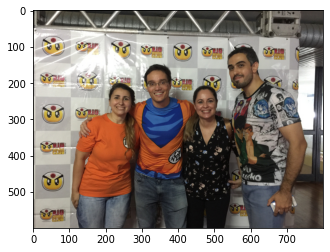

In [ ]:
# Load the test image and create a greyscale copy of it to be used in the classifiers
base_image = cv2.imread('test.jpg')
grey = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))

# Face Detection

We will use the pre-trained model haarcascade_frontalface_default.xml to detect faces in the photo. You can find more details about the parameters ofthe detectMultiScale function [here](https://docs.opencv.org/3.4/d1/de5/classcv_1_1CascadeClassifier.html#aaf8181cb63968136476ec4204ffca498).

**Note**: In all examples, I reload the color image again, because the imshow function rewrites the original image with the boxes, but I use the same grayscale image for detection)

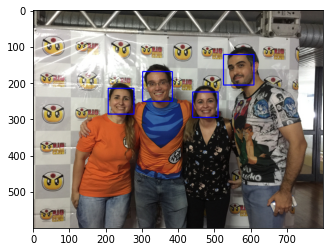

In [ ]:
# this is a pre-trained face cascade
test_image = cv2.imread('test.jpg')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

## Smile Detection

We will use the pre-trained model haarcascade_smile.xml to detect smiles on the pictures.

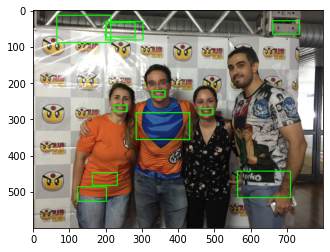

In [ ]:
# this is a pre-trained face cascade
test_image = cv2.imread('test.jpg')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')
smiles = smile_cascade.detectMultiScale(grey, 1.3, 20)
for (x,y,w,h) in smiles:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

As you can see, it detected the smiles correctly (the right guy, who is actually me, is not giving a full smile) but there are a lot of false positives, as usual in cascade models. Therefore, to improve this, we will only consider detected smiles inside previously detected faces.

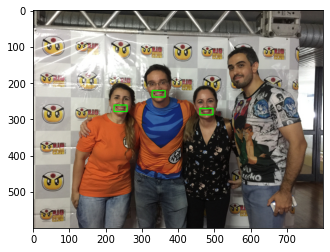

In [ ]:
# this is a pre-trained face cascade
test_image = cv2.imread('test.jpg')
for (x,y,w,h) in faces:
  for (x_s,y_s,w_s,h_s) in smiles:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

# Eye Detection

Using the pre-trained model haarcascade_frontalface_default.xml to detect faces on the pictures.

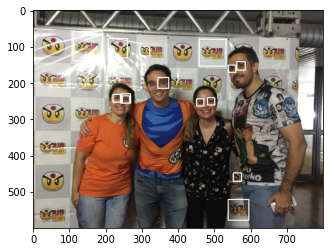

In [ ]:
test_image = cv2.imread('test.jpg')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(grey, 1.3, 1)
for (x,y,w,h) in eyes:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,255,255),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

Similar to what happened to the smiles, there is a few of false positives, and in this particular case a false negative (probably the glass confused the classifier). So we will use the same approach to filter recognized eyes that are inside faces.

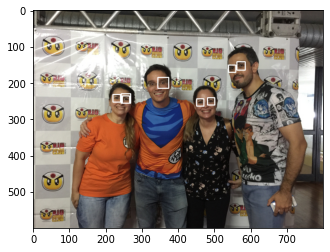

In [ ]:
test_image = cv2.imread('test.jpg')
for (x,y,w,h) in faces:
  #cv2.rectangle(smile_faces_base_image,(x,y),(x+w,y+h),(255,0,0),2)
  for (x_s,y_s,w_s,h_s) in eyes:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

## Putting all together



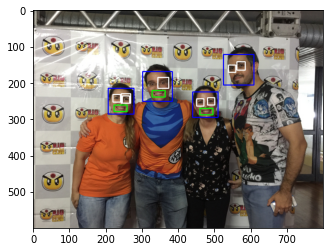

In [ ]:
test_image = cv2.imread('test.jpg')
for (x,y,w,h) in faces:
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
  for (x_s,y_s,w_s,h_s) in eyes:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)
  for (x_s,y_s,w_s,h_s) in smiles:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

### Download the code zip file

In [ ]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/haar-face-detection/haar-face-detection.zip
!unzip -qq haar-face-detection.zip
%cd haar-face-detection

--2022-07-03 13:48:26--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/haar-face-detection/haar-face-detection.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.182.137
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.182.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2184692 (2.1M) [application/zip]
Saving to: ‘haar-face-detection.zip’

haar-face-detection 100%[===================>]   2.08M  4.27MB/s    in 0.5s    

2022-07-03 13:48:26 (4.27 MB/s) - ‘haar-face-detection.zip’ saved [2184692/2184692]

/content/haar-face-detection


### Import Packages

In [ ]:
# import the necessary packages
from imutils.video import VideoStream
import matplotlib.pyplot as plt
import argparse
import imutils
import cv2

In [ ]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Implementing face detection with OpenCV and Haar Cascades

In [ ]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", type=str, required=True,
#	help="path to input image")
#ap.add_argument("-c", "--cascade", type=str,
#	default="haarcascade_frontalface_default.xml",
#	help="path to haar cascade face detector")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "image": "images/adrian_01.png",
    "cascade": "haarcascade_frontalface_default.xml"
}

In [ ]:
# load the haar cascade face detector from
print("[INFO] loading face detector...")
detector = cv2.CascadeClassifier(args["cascade"])

# load the input image from disk, resize it, and convert it to
# grayscale
image = cv2.imread(args["image"])
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

[INFO] loading face detector...


[INFO] performing face detection...
[INFO] 1 faces detected...


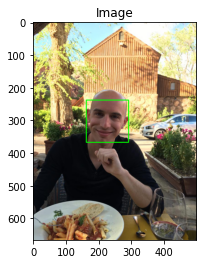

In [ ]:
# detect faces in the input image using the haar cascade face
# detector
print("[INFO] performing face detection...")
rects = detector.detectMultiScale(gray, scaleFactor=1.05,
	minNeighbors=5, minSize=(30, 30),
	flags=cv2.CASCADE_SCALE_IMAGE)
print("[INFO] {} faces detected...".format(len(rects)))

# loop over the bounding boxes
for (x, y, w, h) in rects:
	# draw the face bounding box on the image
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# show the output image
plt_imshow("Image", image)

### Implementing real-time face detection with Haar cascade

In [ ]:
# first, let's get a video on which we can run our face detector 
!wget https://colab-notebook-videos.s3-us-west-2.amazonaws.com/opencv_face_detection.mp4

--2022-07-03 13:48:28--  https://colab-notebook-videos.s3-us-west-2.amazonaws.com/opencv_face_detection.mp4
Resolving colab-notebook-videos.s3-us-west-2.amazonaws.com (colab-notebook-videos.s3-us-west-2.amazonaws.com)... 52.218.138.81
Connecting to colab-notebook-videos.s3-us-west-2.amazonaws.com (colab-notebook-videos.s3-us-west-2.amazonaws.com)|52.218.138.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36191613 (35M) [video/mp4]
Saving to: ‘opencv_face_detection.mp4’

opencv_face_detecti 100%[===================>]  34.51M  20.8MB/s    in 1.7s    

2022-07-03 13:48:30 (20.8 MB/s) - ‘opencv_face_detection.mp4’ saved [36191613/36191613]



In [ ]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-c", "--cascade", type=str,
#	default="haarcascade_frontalface_default.xml",
#	help="path to haar cascade face detector")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "input": "/content/haar-face-detection/opencv_face_detection.mp4",
    "output": "output.avi",
    "cascade": "/content/haar-face-detection/haarcascade_frontalface_default.xml"
}

In [ ]:
# load the haar cascade face detector from
print("[INFO] loading face detector...")
detector = cv2.CascadeClassifier(args["cascade"])

# grab a reference to the video file and initialize pointer to output
# video file
print("[INFO] opening video file...")
vs = cv2.VideoCapture(args["input"])
writer = None

[INFO] loading face detector...
[INFO] opening video file...


In [ ]:
# loop over the frames from the video stream
while True:
	# grab the next frame
	frame = vs.read()[1]

	# if we did not grab a frame then we have reached the end of the
	# video
	if frame is None:
		break
    
    # resize the frame and convert it to grayscale
	frame = imutils.resize(frame, width=500)
	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

	# perform face detection
	rects = detector.detectMultiScale(gray, scaleFactor=1.05,
		minNeighbors=5, minSize=(30, 30),
		flags=cv2.CASCADE_SCALE_IMAGE)
 

	# loop over the bounding boxes
	for (x, y, w, h) in rects:
		# draw the face bounding box on the image
		cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

	# if the video writer is None *AND* we are supposed to write
	# the output video to disk initialize the writer
	if writer is None and args["output"] is not None:
		fourcc = cv2.VideoWriter_fourcc(*"MJPG")
		writer = cv2.VideoWriter(args["output"], fourcc, 20,
			(frame.shape[1], frame.shape[0]), True)
  
	# if the writer is not None, write the frame to disk
	if writer is not None:
		writer.write(frame)

# do a bit of cleanup
vs.release()

# check to see if the video writer point needs to be released
if writer is not None:
	writer.release()

Note that the above code block may take time to execute. If you are interested to view the video within Colab just execute the following code blocks. Note that it may be time-consuming.

Our output video is produced in `.avi` format. First, we need to convert it to `.mp4` format.

In [ ]:
!ffmpeg -i output.avi /content/haar-face-detection/opencv_face_detection.mp4

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open("/content/haar-face-detection/opencv_face_detection.mp4", "rb").read()
dataURL = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % dataURL)

# Modern Object Recognition

Although most of this type of object detection has recently been replaced in the industry by solutions based on Deep Neural Networks models created and trained in platforms like [TensorFlow](https://www.tensorflow.org/), the Viola Jones method for face detection is still a really well respected detector.
And even in modern DNN-based systems OpenCV is still widely used for image manipulation, pre and post-processing .
